In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
import numpy as np
ages = data['age'].values #Created  a vector of age.
print(ages)

[19 18 28 ... 18 21 61]


In [ ]:
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 0})
data['region'] = pd.Categorical(data['region']).codes

<ipython-input-7-86db77fcbb38>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
<ipython-input-7-86db77fcbb38>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 0})


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,1,21984.47
4,32,0,28.9,0,0,1,3866.86


In [ ]:
sex_factor = pd.Categorical(data['sex'])
print(sex_factor)

[1, 0, 0, 0, 0, ..., 0, 1, 1, 1, 1]
Length: 1338
Categories (2, int64): [0, 1]


In [ ]:
data_list = [ages,sex_factor] #created a list
print(data_list)

[array([19, 18, 28, ..., 18, 21, 61]), [1, 0, 0, 0, 0, ..., 0, 1, 1, 1, 1]
Length: 1338
Categories (2, int64): [0, 1]]


In [ ]:
matrix = data[['age','expenses']].to_numpy() #createda matrix
print(matrix)

[[1.900000e+01 1.688492e+04]
 [1.800000e+01 1.725550e+03]
 [2.800000e+01 4.449460e+03]
 ...
 [1.800000e+01 1.629830e+03]
 [2.100000e+01 2.007950e+03]
 [6.100000e+01 2.914136e+04]]


In [ ]:
insurance_df = data    #dataframe
print(insurance_df.head())
print(insurance_df)

   age  sex   bmi  children  smoker  region  expenses
0   19    1  27.9         0       1       3  16884.92
1   18    0  33.8         1       0       2   1725.55
2   28    0  33.0         3       0       2   4449.46
3   33    0  22.7         0       0       1  21984.47
4   32    0  28.9         0       0       1   3866.86
      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       3  16884.92
1      18    0  33.8         1       0       2   1725.55
2      28    0  33.0         3       0       2   4449.46
3      33    0  22.7         0       0       1  21984.47
4      32    0  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       0       1  10600.55
1334   18    1  31.9         0       0       0   2205.98
1335   18    1  36.9         0       0       2   1629.83
1336   21    1  25.8         0       0       3   2007.95
1337   61    1  29.1         0       1       1  2

In [ ]:

smokers = data[data['smoker'] == 1]

smokers_by_age = smokers.groupby('age').size()

print(smokers_by_age.sort_values(ascending=False).head())

age
19    18
18    12
43    12
47    10
27     9
dtype: int64


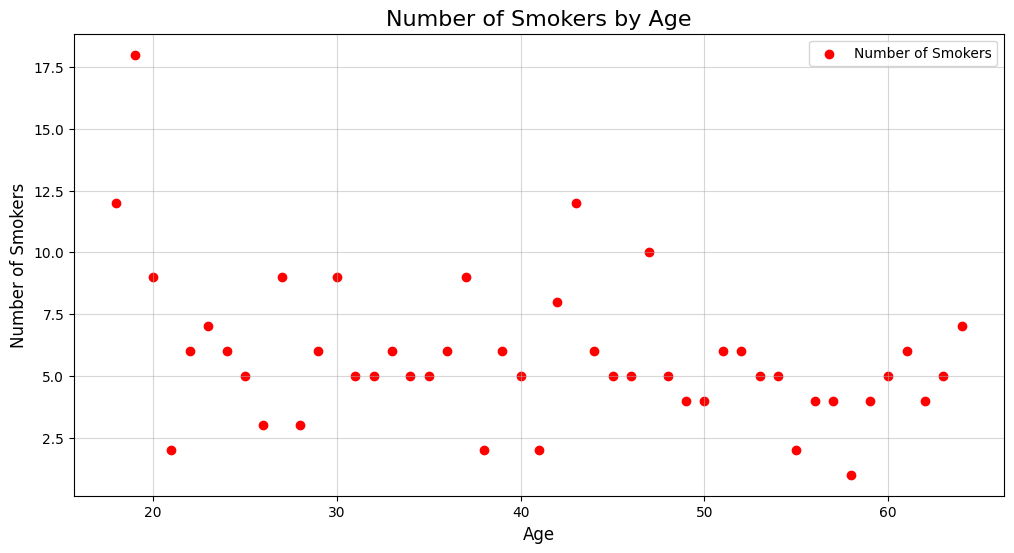

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(smokers_by_age.index, smokers_by_age.values, marker='o', color='red', label='Number of Smokers')
plt.title("Number of Smokers by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [ ]:
smokers_filtered = smokers_by_age[(smokers_by_age.index>=20) & (smokers_by_age.index<=40)]

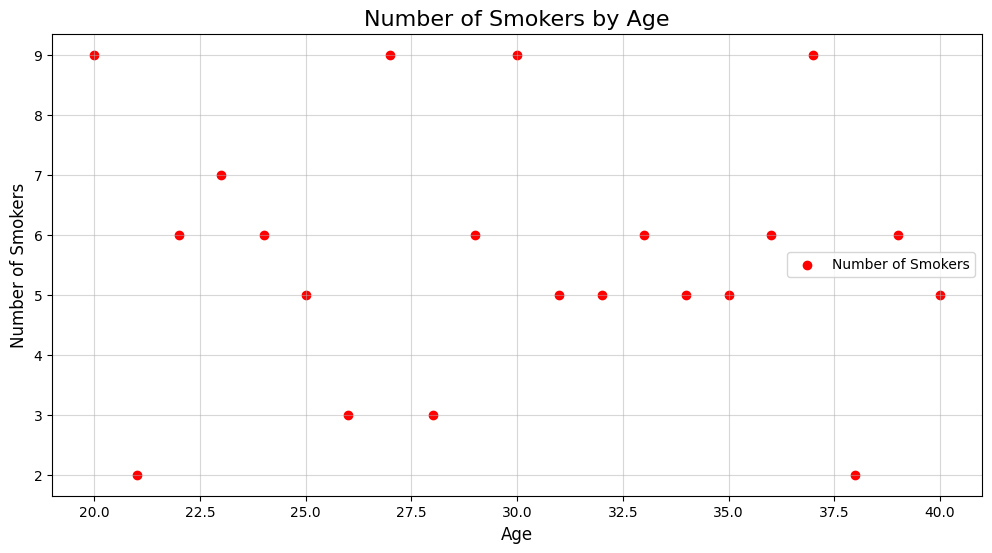

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(smokers_filtered.index, smokers_filtered.values, marker='o', color='red', label='Number of Smokers')
plt.title("Number of Smokers by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

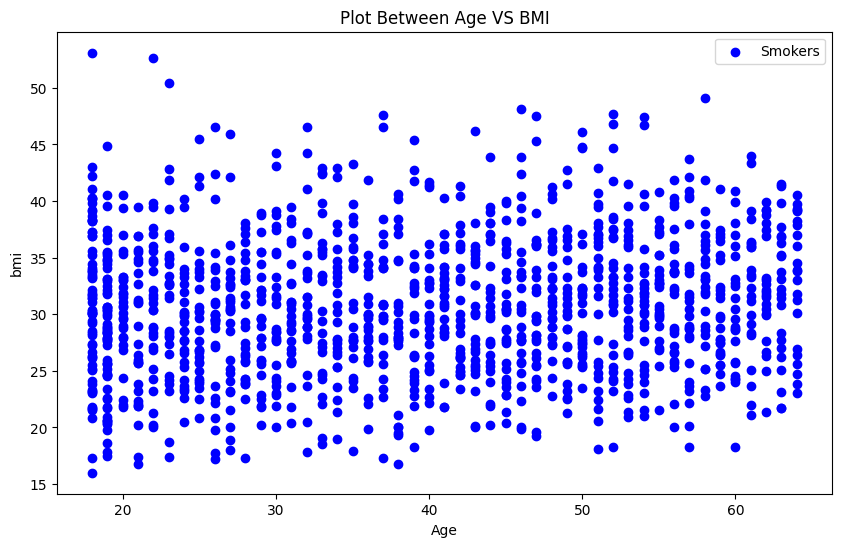

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['bmi'], c='blue', marker='o', label='Smokers')
plt.title("Plot Between Age VS BMI")
plt.xlabel("Age")
plt.ylabel("bmi")
plt.legend()
plt.show()

In [ ]:
filtered_data = data[data['expenses'] > 20000]
print(filtered_data)

      age  sex   bmi  children  smoker  region  expenses
3      33    0  22.7         0       0       1  21984.47
9      60    1  25.8         0       0       1  28923.14
11     62    1  26.3         0       1       2  27808.73
14     27    0  42.1         0       1       2  39611.76
19     30    0  35.3         0       1       3  36837.47
...   ...  ...   ...       ...     ...     ...       ...
1313   19    1  34.7         2       1       3  36397.58
1321   62    0  26.7         0       1       0  28101.33
1323   42    1  40.4         2       1       2  43896.38
1328   23    1  24.2         2       0       0  22395.74
1337   61    1  29.1         0       1       1  29141.36

[273 rows x 7 columns]


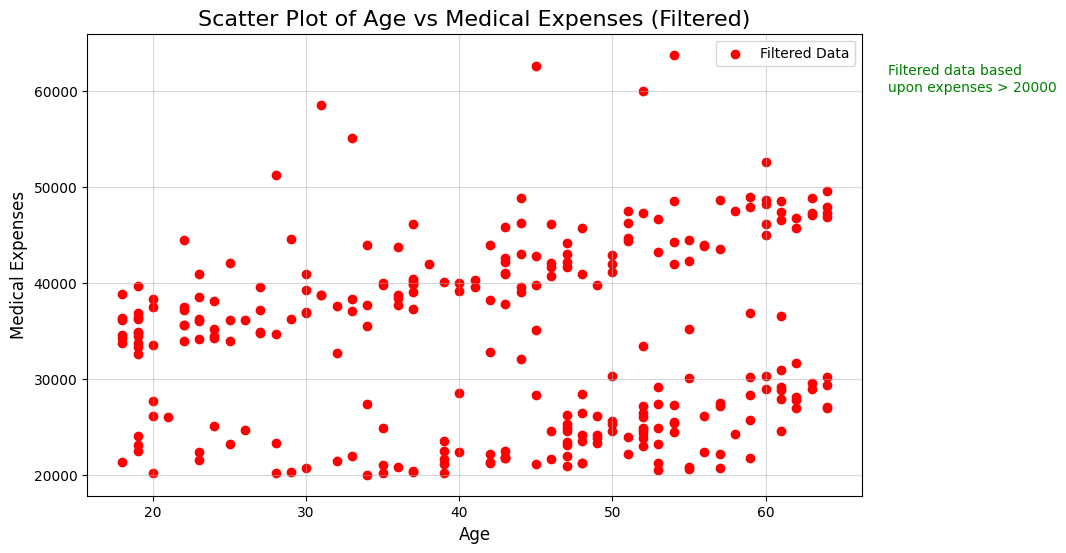

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['age'], filtered_data['expenses'], c='red', marker='o', label='Filtered Data')
plt.title("Scatter Plot of Age vs Medical Expenses (Filtered)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Medical Expenses", fontsize=12)
plt.text(68, 60000, "Filtered data based \nupon expenses > 20000", fontsize=10, color='green')
plt.legend()
plt.grid(alpha=0.5)
plt.show()